# Experimento com DINO

## Descrição

Neste experimento, será executado o DINOv2 para criar um modelo de reconstrução de imagens, com base em um dataset composto por recortes de ortofoto de plantação de soja.

O dataset está organizado da seguinte forma:
-- daninhas_multiclasse2
---- /labels: contém máscaras de segmentação de algumas daninhas em relação a respectiva imagem
---- /rgb: contém as imagens originais do dataset
    => ambos subdiretórios estão subdivididos em train e val

Classes de daninhas:
    * GRAMINEA_PORTE_ALTO: red
    * GRAMINEA_PORTE_BAIXO: green
    * TREPADEIRA: yellow
    * OUTRAS_FOLHAS_LARGAS: blue
    * MAMONA: magenta
    * BACKGROUND
   
## Metodologia
1) Aplicar o DINO sobre o diretório daninhas_multiclasse2/rgb, apenas para inicialmente criar um encoder com features visuais úteis para o contexto da soja.

2) Usar o encoder obtido anteriormente para gerar um "id" (vetor de características) de daninhas.

In [ ]:
%pip install -r requirements.txt

### Parte 1

1) Aplicar o DINO sobre o diretório daninhas_multiclasse2/rgb, apenas para inicialmente criar um encoder com features visuais úteis para o contexto da soja.

#### Experimento 1

Rodei com 100 épocas e batch_size_per_gpu = 32 só para testar
Arquitetura padrão (vit_small)

Observações
loss obtido: 7.68

In [ ]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_small',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output',
    '--epochs', '100',
    '--batch_size_per_gpu', '32'  
]

os.system(' '.join(comando))

#### Experimento 2
Dobrar o número de épocas e processamento em lote das imagens pela GPU em relação ao experimento 1

Resultados/Observações
loss foi superior ao experimento 1

Conclusão: embora o número de épocas seja o dobro, o processamento acaba sendo equivalente, por conta do número de imagens por lote pela GPU. Talvez tenha sido esta a causa do loss superior

In [ ]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_small',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output_batch_size_64_epochs_200',
    '--epochs', '200',
    '--batch_size_per_gpu', '64'  
]

os.system(' '.join(comando))

#### Experimento 3
Manter os parâmetros anteriores, mas dobrar também a taxa de aprendizagem, para garantir que a cada iteração a taxa de aprendizagem aumente proporcionalmente.

Resultados/Observações
O loss foi pior. No próximo experimento vou diminuir o batch_size e epoch e modificar a arquitetura para vit_base

In [8]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_small',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output_batch_size_64_epochs_200_lr_0.001',
    '--epochs', '200',
    '--batch_size_per_gpu', '64',
    '--lr', '0.001'
]

os.system(' '.join(comando))

Using cache found in /home/lades/.cache/torch/hub/facebookresearch_xcit_main
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once
[rank0]:[W814 18:20:59.077878469 Process

Will run the code on one GPU.
| distributed init (rank 0): env://
git:
  sha: 7c446df5b9f45747937fb0d72314eb9f7b66930a, status: clean, branch: main

arch: vit_small
batch_size_per_gpu: 64
clip_grad: 3.0
data_path: /home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb
dist_url: env://
drop_path_rate: 0.1
epochs: 200
freeze_last_layer: 1
global_crops_scale: (0.4, 1.0)
gpu: 0
local_crops_number: 8
local_crops_scale: (0.05, 0.4)
local_rank: 0
lr: 0.001
min_lr: 1e-06
momentum_teacher: 0.996
norm_last_layer: True
num_workers: 10
optimizer: adamw
out_dim: 65536
output_dir: daninhas_multiclasse2_output_batch_size_64_epochs_200_lr_0.001
patch_size: 16
rank: 0
saveckp_freq: 20
seed: 0
teacher_temp: 0.04
use_bn_in_head: False
use_fp16: True
warmup_epochs: 10
warmup_teacher_temp: 0.04
warmup_teacher_temp_epochs: 0
weight_decay: 0.04
weight_decay_end: 0.4
world_size: 1
Data loaded: there are 955 images.


/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Student and Teacher are built: they are both vit_small network.
Loss, optimizer and schedulers ready.
Starting DINO training !


/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:235: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  fp16_scaler = torch.cuda.amp.GradScaler()
/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:317: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(fp16_scaler is not None):


Epoch: [0/200]  [ 0/14]  eta: 0:01:18  loss: 10.837372 (10.837372)  lr: 0.000000 (0.000000)  wd: 0.040000 (0.040000)  time: 5.642624  data: 3.141118  max mem: 11170
Epoch: [0/200]  [10/14]  eta: 0:00:02  loss: 10.917164 (10.912179)  lr: 0.000009 (0.000009)  wd: 0.040003 (0.040004)  time: 0.715831  data: 0.285673  max mem: 11499
Epoch: [0/200]  [13/14]  eta: 0:00:00  loss: 10.926767 (10.926726)  lr: 0.000011 (0.000012)  wd: 0.040004 (0.040007)  time: 0.605154  data: 0.224480  max mem: 11499
Epoch: [0/200] Total time: 0:00:08 (0.611143 s / it)
Averaged stats: loss: 10.926767 (10.926726)  lr: 0.000011 (0.000012)  wd: 0.040004 (0.040007)


/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once


Epoch: [1/200]  [ 0/14]  eta: 0:01:08  loss: 10.955724 (10.955724)  lr: 0.000025 (0.000025)  wd: 0.040022 (0.040022)  time: 4.865923  data: 4.622991  max mem: 11499
Epoch: [1/200]  [10/14]  eta: 0:00:02  loss: 10.938473 (10.939017)  lr: 0.000034 (0.000034)  wd: 0.040041 (0.040042)  time: 0.629421  data: 0.420396  max mem: 11675
Epoch: [1/200]  [13/14]  eta: 0:00:00  loss: 10.926256 (10.931129)  lr: 0.000036 (0.000037)  wd: 0.040045 (0.040049)  time: 0.537154  data: 0.330334  max mem: 11675
Epoch: [1/200] Total time: 0:00:07 (0.543327 s / it)
Averaged stats: loss: 10.926256 (10.931129)  lr: 0.000036 (0.000037)  wd: 0.040045 (0.040049)
Epoch: [2/200]  [ 0/14]  eta: 0:01:06  loss: 10.911117 (10.911117)  lr: 0.000050 (0.000050)  wd: 0.040089 (0.040089)  time: 4.735847  data: 4.492094  max mem: 11675
Epoch: [2/200]  [10/14]  eta: 0:00:02  loss: 10.893131 (10.868334)  lr: 0.000059 (0.000059)  wd: 0.040123 (0.040125)  time: 0.618033  data: 0.408503  max mem: 11675
Epoch: [2/200]  [13/14]  eta

[rank0]:[W814 18:53:39.557223017 ProcessGroupNCCL.cpp:1538] Warning: WARNING: destroy_process_group() was not called before program exit, which can leak resources. For more info, please see https://pytorch.org/docs/stable/distributed.html#shutdown (function operator())


0

#### Experimento 4
Manter os parâmetros iniciais (Experimento 1)
Modificar a arquitetura (vit_base) com 16 patches mesmo (default).

Resultados/Observações

Averaged stats: loss: 7.312402 (7.266158)  lr: 0.000001 (0.000001)  wd: 0.399997 (0.399970)

In [ ]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_base',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output_vit_base_batch_size_16_epochs_100',
    '--epochs', '100',
    '--batch_size_per_gpu', '16'
]

os.system(' '.join(comando))

#### Experimento 5
Manter os parâmetros iniciais (Experimento 1)
Arquitetura (vit_base) 
batch_size_per_gpu = 8 -> tive que diminuir para a GPU dar conta!!
patch_size = 8: a ideia é que o modelo considere um grupo menor de pixels já que o patch será menor

Resultados/Observações/Encaminhamento
Gerou os patches mais detalhados, mas acabou sendo irrelevante para a daninha
Muito demorado (132 min); tive que reduzir o número de batches por gpu.

Foi o menor loss encontrado (mas isso n quis dizer nd!!)

Fazer outro experimento com patch_size maior.. Por exemplo 32 ou 64


In [ ]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_base',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output_vit_base_batch_size_8_patch_size_8_epochs_100',
    '--epochs', '100',
    '--batch_size_per_gpu', '8',
    '--patch_size', '8',
    '--use_fp16', 'false'
]

os.system(' '.join(comando))

#### Experimento 6
Manter os parâmetros iniciais (Experimento 1)
Arquitetura (vit_base) 
batch_size_per_gpu = 32 
patch_size = 64: agora os patches terão 64x64 = 4096 pixels (um pouco mais de chance de pegar um recorte que contenha mais daninha do que plantação)

Resultados/Observações/Encaminhamento
loss 10.32
Rodar com 32 x 32

In [ ]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_base',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output_vit_base_batch_size_32_patch_size_64_epochs_100',
    '--epochs', '100',
    '--batch_size_per_gpu', '32',
    '--patch_size', '64'
]

os.system(' '.join(comando))

#### Experimento 7
Manter os parâmetros iniciais (Experimento 1)
Arquitetura (vit_base) 
batch_size_per_gpu = 64 (default); depois 32; depois 16 
patch_size = 32 (o de 64 x 64 ficou ruim)

Resultados/Observações/Encaminhamento


In [56]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_base',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output_vit_base_batch_size_64_patch_size_32_epochs_100',
    '--epochs', '100',
    '--batch_size_per_gpu', '64',
    '--patch_size', '32'
]

os.system(' '.join(comando))

Using cache found in /home/lades/.cache/torch/hub/facebookresearch_xcit_main
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once
[rank0]:[W815 14:16:12.578160729 Process

Will run the code on one GPU.
| distributed init (rank 0): env://
git:
  sha: 7c446df5b9f45747937fb0d72314eb9f7b66930a, status: has uncommited changes, branch: main

arch: vit_base
batch_size_per_gpu: 64
clip_grad: 3.0
data_path: /home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb
dist_url: env://
drop_path_rate: 0.1
epochs: 100
freeze_last_layer: 1
global_crops_scale: (0.4, 1.0)
gpu: 0
local_crops_number: 8
local_crops_scale: (0.05, 0.4)
local_rank: 0
lr: 0.0005
min_lr: 1e-06
momentum_teacher: 0.996
norm_last_layer: True
num_workers: 10
optimizer: adamw
out_dim: 65536
output_dir: daninhas_multiclasse2_output_vit_base_batch_size_64_patch_size_32_epochs_100
patch_size: 32
rank: 0
saveckp_freq: 20
seed: 0
teacher_temp: 0.04
use_bn_in_head: False
use_fp16: True
warmup_epochs: 10
warmup_teacher_temp: 0.04
warmup_teacher_temp_epochs: 0
weight_decay: 0.04
weight_decay_end: 0.4
world_size: 1
Data loaded: there are 955 images.
git:
  sha: 7c446df5b9f45747937fb0d72314eb9f7b6693

/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(modu

Student and Teacher are built: they are both vit_base network.
Loss, optimizer and schedulers ready.
Starting DINO training !


/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:235: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  fp16_scaler = torch.cuda.amp.GradScaler()
/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:317: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(fp16_scaler is not None):
/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:317: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(fp16_scaler is not None):


Epoch: [0/100]  [ 0/14]  eta: 0:01:18  loss: 10.797078 (10.797078)  lr: 0.000000 (0.000000)  wd: 0.040000 (0.040000)  time: 5.621730  data: 3.717418  max mem: 6642
Epoch: [0/100]  [10/14]  eta: 0:00:02  loss: 10.888615 (10.889145)  lr: 0.000004 (0.000004)  wd: 0.040011 (0.040016)  time: 0.646534  data: 0.338104  max mem: 7744
Epoch: [0/100]  [10/14]  eta: 0:00:02  loss: 10.888615 (10.889145)  lr: 0.000004 (0.000004)  wd: 0.040011 (0.040016)  time: 0.646534  data: 0.338104  max mem: 7744
Epoch: [0/100]  [13/14]  eta: 0:00:00  loss: 10.908324 (10.916873)  lr: 0.000005 (0.000006)  wd: 0.040016 (0.040027)  time: 0.552654  data: 0.265722  max mem: 7744
Epoch: [0/100] Total time: 0:00:07 (0.558419 s / it)
Averaged stats: loss: 10.908324 (10.916873)  lr: 0.000005 (0.000006)  wd: 0.040016 (0.040027)
Epoch: [0/100]  [13/14]  eta: 0:00:00  loss: 10.908324 (10.916873)  lr: 0.000005 (0.000006)  wd: 0.040016 (0.040027)  time: 0.552654  data: 0.265722  max mem: 7744
Epoch: [0/100] Total time: 0:00:0

/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once


Epoch: [1/100]  [ 0/14]  eta: 0:00:59  loss: 11.016278 (11.016278)  lr: 0.000013 (0.000013)  wd: 0.040089 (0.040089)  time: 4.231538  data: 3.970463  max mem: 7744
Epoch: [1/100]  [10/14]  eta: 0:00:02  loss: 11.003705 (10.997996)  lr: 0.000017 (0.000017)  wd: 0.040164 (0.040168)  time: 0.550752  data: 0.390694  max mem: 7934
Epoch: [1/100]  [10/14]  eta: 0:00:02  loss: 11.003705 (10.997996)  lr: 0.000017 (0.000017)  wd: 0.040164 (0.040168)  time: 0.550752  data: 0.390694  max mem: 7934
Epoch: [1/100]  [13/14]  eta: 0:00:00  loss: 11.002125 (10.994421)  lr: 0.000018 (0.000018)  wd: 0.040181 (0.040198)  time: 0.480273  data: 0.324761  max mem: 7934
Epoch: [1/100] Total time: 0:00:06 (0.488370 s / it)
Averaged stats: loss: 11.002125 (10.994421)  lr: 0.000018 (0.000018)  wd: 0.040181 (0.040198)
Epoch: [1/100]  [13/14]  eta: 0:00:00  loss: 11.002125 (10.994421)  lr: 0.000018 (0.000018)  wd: 0.040181 (0.040198)  time: 0.480273  data: 0.324761  max mem: 7934
Epoch: [1/100] Total time: 0:00:0

[rank0]:[W815 14:36:58.275895023 ProcessGroupNCCL.cpp:1538] Warning: WARNING: destroy_process_group() was not called before program exit, which can leak resources. For more info, please see https://pytorch.org/docs/stable/distributed.html#shutdown (function operator())


0

In [57]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_base',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output_vit_base_batch_size_32_patch_size_32_epochs_100',
    '--epochs', '100',
    '--batch_size_per_gpu', '32',
    '--patch_size', '32'
]

os.system(' '.join(comando))

Using cache found in /home/lades/.cache/torch/hub/facebookresearch_xcit_main
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once
[rank0]:[W815 14:37:02.154709091 Process

Will run the code on one GPU.
| distributed init (rank 0): env://
git:
  sha: 7c446df5b9f45747937fb0d72314eb9f7b66930a, status: has uncommited changes, branch: main

arch: vit_base
batch_size_per_gpu: 32
clip_grad: 3.0
data_path: /home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb
dist_url: env://
drop_path_rate: 0.1
epochs: 100
freeze_last_layer: 1
global_crops_scale: (0.4, 1.0)
gpu: 0
local_crops_number: 8
local_crops_scale: (0.05, 0.4)
local_rank: 0
lr: 0.0005
min_lr: 1e-06
momentum_teacher: 0.996
norm_last_layer: True
num_workers: 10
optimizer: adamw
out_dim: 65536
output_dir: daninhas_multiclasse2_output_vit_base_batch_size_32_patch_size_32_epochs_100
patch_size: 32
rank: 0
saveckp_freq: 20
seed: 0
teacher_temp: 0.04
use_bn_in_head: False
use_fp16: True
warmup_epochs: 10
warmup_teacher_temp: 0.04
warmup_teacher_temp_epochs: 0
weight_decay: 0.04
weight_decay_end: 0.4
world_size: 1
Data loaded: there are 955 images.
git:
  sha: 7c446df5b9f45747937fb0d72314eb9f7b6693

/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(modu

Student and Teacher are built: they are both vit_base network.
Loss, optimizer and schedulers ready.
Starting DINO training !


/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:235: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  fp16_scaler = torch.cuda.amp.GradScaler()
/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:317: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(fp16_scaler is not None):
/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:317: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(fp16_scaler is not None):


Epoch: [0/100]  [ 0/29]  eta: 0:01:51  loss: 10.792233 (10.792233)  lr: 0.000000 (0.000000)  wd: 0.040000 (0.040000)  time: 3.858684  data: 1.927594  max mem: 4147
Epoch: [0/100]  [10/29]  eta: 0:00:09  loss: 10.881153 (10.903924)  lr: 0.000001 (0.000001)  wd: 0.040003 (0.040004)  time: 0.496831  data: 0.176802  max mem: 5238
Epoch: [0/100]  [10/29]  eta: 0:00:09  loss: 10.881153 (10.903924)  lr: 0.000001 (0.000001)  wd: 0.040003 (0.040004)  time: 0.496831  data: 0.176802  max mem: 5238
Epoch: [0/100]  [20/29]  eta: 0:00:02  loss: 10.992283 (10.963635)  lr: 0.000002 (0.000002)  wd: 0.040011 (0.040014)  time: 0.132292  data: 0.000918  max mem: 5238
Epoch: [0/100]  [20/29]  eta: 0:00:02  loss: 10.992283 (10.963635)  lr: 0.000002 (0.000002)  wd: 0.040011 (0.040014)  time: 0.132292  data: 0.000918  max mem: 5238
Epoch: [0/100]  [28/29]  eta: 0:00:00  loss: 11.031642 (10.988441)  lr: 0.000004 (0.000003)  wd: 0.040034 (0.040028)  time: 0.108028  data: 0.000118  max mem: 5238
Epoch: [0/100] T

/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once


Epoch: [1/100]  [ 0/29]  eta: 0:01:15  loss: 11.056684 (11.056684)  lr: 0.000006 (0.000006)  wd: 0.040089 (0.040089)  time: 2.586299  data: 2.282231  max mem: 5238
Epoch: [1/100]  [10/29]  eta: 0:00:08  loss: 11.010142 (11.007572)  lr: 0.000007 (0.000007)  wd: 0.040122 (0.040123)  time: 0.449575  data: 0.211616  max mem: 5409
Epoch: [1/100]  [10/29]  eta: 0:00:08  loss: 11.010142 (11.007572)  lr: 0.000007 (0.000007)  wd: 0.040122 (0.040123)  time: 0.449575  data: 0.211616  max mem: 5409
Epoch: [1/100]  [20/29]  eta: 0:00:02  loss: 10.981767 (10.982080)  lr: 0.000008 (0.000008)  wd: 0.040161 (0.040164)  time: 0.171567  data: 0.002335  max mem: 5409
Epoch: [1/100]  [20/29]  eta: 0:00:02  loss: 10.981767 (10.982080)  lr: 0.000008 (0.000008)  wd: 0.040161 (0.040164)  time: 0.171567  data: 0.002335  max mem: 5409
Epoch: [1/100]  [28/29]  eta: 0:00:00  loss: 10.956777 (10.971718)  lr: 0.000010 (0.000009)  wd: 0.040233 (0.040203)  time: 0.117405  data: 0.000114  max mem: 5409
Epoch: [1/100] T

[rank0]:[W815 14:58:39.716699756 ProcessGroupNCCL.cpp:1538] Warning: WARNING: destroy_process_group() was not called before program exit, which can leak resources. For more info, please see https://pytorch.org/docs/stable/distributed.html#shutdown (function operator())


0

In [58]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_base',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb',
    '--output_dir', 'daninhas_multiclasse2_output_vit_base_batch_size_16_patch_size_32_epochs_100',
    '--epochs', '100',
    '--batch_size_per_gpu', '16',
    '--patch_size', '32'
]

os.system(' '.join(comando))

Using cache found in /home/lades/.cache/torch/hub/facebookresearch_xcit_main
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once
[rank0]:[W815 14:58:42.558323602 Process

Will run the code on one GPU.
| distributed init (rank 0): env://
git:
  sha: 7c446df5b9f45747937fb0d72314eb9f7b66930a, status: has uncommited changes, branch: main

arch: vit_base
batch_size_per_gpu: 16
clip_grad: 3.0
data_path: /home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb
dist_url: env://
drop_path_rate: 0.1
epochs: 100
freeze_last_layer: 1
global_crops_scale: (0.4, 1.0)
gpu: 0
local_crops_number: 8
local_crops_scale: (0.05, 0.4)
local_rank: 0
lr: 0.0005
min_lr: 1e-06
momentum_teacher: 0.996
norm_last_layer: True
num_workers: 10
optimizer: adamw
out_dim: 65536
output_dir: daninhas_multiclasse2_output_vit_base_batch_size_16_patch_size_32_epochs_100
patch_size: 32
rank: 0
saveckp_freq: 20
seed: 0
teacher_temp: 0.04
use_bn_in_head: False
use_fp16: True
warmup_epochs: 10
warmup_teacher_temp: 0.04
warmup_teacher_temp_epochs: 0
weight_decay: 0.04
weight_decay_end: 0.4
world_size: 1
Data loaded: there are 955 images.
git:
  sha: 7c446df5b9f45747937fb0d72314eb9f7b6693

/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(modu

Student and Teacher are built: they are both vit_base network.
Loss, optimizer and schedulers ready.
Starting DINO training !


/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:235: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  fp16_scaler = torch.cuda.amp.GradScaler()
/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:317: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(fp16_scaler is not None):
/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:317: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(fp16_scaler is not None):


Epoch: [0/100]  [ 0/59]  eta: 0:02:17  loss: 10.806355 (10.806355)  lr: 0.000000 (0.000000)  wd: 0.040000 (0.040000)  time: 2.332763  data: 0.917706  max mem: 3256
Epoch: [0/100]  [10/59]  eta: 0:00:15  loss: 10.907465 (10.902328)  lr: 0.000000 (0.000000)  wd: 0.040001 (0.040001)  time: 0.318327  data: 0.083598  max mem: 3975
Epoch: [0/100]  [10/59]  eta: 0:00:15  loss: 10.907465 (10.902328)  lr: 0.000000 (0.000000)  wd: 0.040001 (0.040001)  time: 0.318327  data: 0.083598  max mem: 3975
Epoch: [0/100]  [20/59]  eta: 0:00:09  loss: 10.986015 (10.976817)  lr: 0.000001 (0.000001)  wd: 0.040003 (0.040003)  time: 0.129138  data: 0.000206  max mem: 3977
Epoch: [0/100]  [20/59]  eta: 0:00:09  loss: 10.986015 (10.976817)  lr: 0.000001 (0.000001)  wd: 0.040003 (0.040003)  time: 0.129138  data: 0.000206  max mem: 3977
Epoch: [0/100]  [30/59]  eta: 0:00:05  loss: 11.071918 (11.008162)  lr: 0.000001 (0.000001)  wd: 0.040010 (0.040008)  time: 0.129103  data: 0.000212  max mem: 3977
Epoch: [0/100]  

/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once


Epoch: [1/100]  [ 0/59]  eta: 0:01:42  loss: 11.089618 (11.089618)  lr: 0.000003 (0.000003)  wd: 0.040089 (0.040089)  time: 1.732401  data: 1.387785  max mem: 3977
Epoch: [1/100]  [10/59]  eta: 0:00:14  loss: 10.969563 (10.968571)  lr: 0.000003 (0.000003)  wd: 0.040105 (0.040105)  time: 0.292556  data: 0.127613  max mem: 4168
Epoch: [1/100]  [10/59]  eta: 0:00:14  loss: 10.969563 (10.968571)  lr: 0.000003 (0.000003)  wd: 0.040105 (0.040105)  time: 0.292556  data: 0.127613  max mem: 4168
Epoch: [1/100]  [20/59]  eta: 0:00:08  loss: 10.948825 (10.960440)  lr: 0.000004 (0.000004)  wd: 0.040121 (0.040122)  time: 0.132478  data: 0.000922  max mem: 4168
Epoch: [1/100]  [20/59]  eta: 0:00:08  loss: 10.948825 (10.960440)  lr: 0.000004 (0.000004)  wd: 0.040121 (0.040122)  time: 0.132478  data: 0.000922  max mem: 4168
Epoch: [1/100]  [30/59]  eta: 0:00:05  loss: 10.921709 (10.954373)  lr: 0.000004 (0.000004)  wd: 0.040159 (0.040142)  time: 0.118558  data: 0.000225  max mem: 4169
Epoch: [1/100]  

[rank0]:[W815 15:22:58.426256405 ProcessGroupNCCL.cpp:1538] Warning: WARNING: destroy_process_group() was not called before program exit, which can leak resources. For more info, please see https://pytorch.org/docs/stable/distributed.html#shutdown (function operator())


0

In [13]:
%pip install scikit-image

  Using cached scikit_image-0.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 KB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 KB 23.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
import os
import subprocess

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/visualize_attention.py',
    '--arch', 'vit_base',
    '--image_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb/val/2025-06-13_198 - Figueira (Scatolin) 04 Soja - 08 01 25 Survey_22464_29416.jpg',
    '--pretrained_weights', 'daninhas_multiclasse2_output_vit_base_batch_size_64_patch_size_32_epochs_100/checkpoint.pth',
    '--image_size', '256', '256',
    '--output_dir', '.',
    '--patch_size', '32'
]

subprocess.run(comando)

Take key teacher in provided checkpoint dict
Pretrained weights found at daninhas_multiclasse2_output_vit_base_batch_size_64_patch_size_32_epochs_100/checkpoint.pth and loaded with msg: _IncompatibleKeys(missing_keys=[], unexpected_keys=['head.mlp.0.weight', 'head.mlp.0.bias', 'head.mlp.2.weight', 'head.mlp.2.bias', 'head.mlp.4.weight', 'head.mlp.4.bias', 'head.last_layer.weight_g', 'head.last_layer.weight_v'])
./attn-head0.png saved.
./attn-head1.png saved.
./attn-head2.png saved.
./attn-head3.png saved.
./attn-head4.png saved.
./attn-head5.png saved.
./attn-head6.png saved.
./attn-head7.png saved.
./attn-head8.png saved.
./attn-head9.png saved.
./attn-head10.png saved.
./attn-head11.png saved.
./attn-head0.png saved.
./attn-head1.png saved.
./attn-head2.png saved.
./attn-head3.png saved.
./attn-head4.png saved.
./attn-head5.png saved.
./attn-head6.png saved.
./attn-head7.png saved.
./attn-head8.png saved.
./attn-head9.png saved.
./attn-head10.png saved.
./attn-head11.png saved.


CompletedProcess(args=['python', 'dino/visualize_attention.py', '--arch', 'vit_base', '--image_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb/val/2025-06-13_198 - Figueira (Scatolin) 04 Soja - 08 01 25 Survey_22464_29416.jpg', '--pretrained_weights', 'daninhas_multiclasse2_output_vit_base_batch_size_64_patch_size_32_epochs_100/checkpoint.pth', '--image_size', '256', '256', '--output_dir', '.', '--patch_size', '32'], returncode=0)

In [3]:
# Obter as imagens de atenção geradas e criar uma única imagem com todas as atenções + imagem original
from PIL import Image
import matplotlib.pyplot as plt
import glob
import numpy as np

import warnings
warnings.filterwarnings("ignore")

def carregar_e_exibir_imagens():
    # Carregar as imagens de atenção
    attention_images = sorted(glob.glob('./attn*.png'))

    original_image = Image.open('./img.png')

    # Configurar a figura para exibir as imagens
    total_images = len(attention_images) + 1
    fig, axes = plt.subplots(1, total_images, figsize=(20, 5))

    # Garantir que axes seja sempre um array
    if total_images == 1:
        axes = [axes]

    # Exibir a imagem original
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Exibir as imagens de atenção
    for i, img_path in enumerate(attention_images):
        attn_img = Image.open(img_path)
        axes[i + 1].imshow(attn_img)
        axes[i + 1].set_title(f'Attention {i+1}')
        axes[i + 1].axis('off')

    plt.tight_layout()
    plt.show()
    # Salvar a figura com todas as imagens
    fig.savefig('combined_attention.png')

## Teste adicional: Pegar uma ortofoto e recortá-la em vários patches 256x256

- Salvar os recortes em um diretório separado
- Gerar um novo modelo e avaliar com o conjunto de teste usado anteriormente

In [2]:
ortofoto_path = '/home/lades/computer_vision/wesley/dataset/ortofotos_soja/438 - Lambari 01/438 - Lambari 01 Soja - 10 02 25-004.tif'
output_dir = '/home/lades/computer_vision/wesley/dataset/438_Lambari_01_patches_256x256/rgb'
patch_size = 256

import os
from PIL import Image
import numpy as np
from tqdm import tqdm # Progress bar

from rasterio.windows import Window
import rasterio

# Função para gerar patches da ortofoto sem carregar tudo na memória
def generate_patches(ortofoto_path, patch_size=256):
    patches = []
    with rasterio.open(ortofoto_path) as src:
        width = src.width
        height = src.height
        
        for i in range(0, height, patch_size):
            for j in range(0, width, patch_size):
                # Garantir que o patch não ultrapasse os limites da imagem
                window_width = min(patch_size, width - j)
                window_height = min(patch_size, height - i)

                window = Window(j, i, window_width, window_height)
                patch = src.read(window=window)
                if patch.shape[1] == window_width and patch.shape[2] == window_height:
                    # Transpor para (altura, largura, canais)
                    patch = np.transpose(patch, (1, 2, 0))
                    patches.append(patch)
                    
        print(f'Total de patches: {len(patches)}')
    return patches

# Criar o diretório de saída se não existir
os.makedirs(output_dir, exist_ok=True)

# Gerar e salvar os patches
patches = generate_patches(ortofoto_path, patch_size)


Total de patches: 54180


In [3]:
def verifica_patch_valido(patch, percentual_valido=0.8):
    # Verifica se o patch não é todo preto ou branco
    if np.all(patch == 0) or np.all(patch == 255):
        return False
    
    # Verifica se o patch possui pelo menos 80% de pixels válidos (um pixel é válido se ele for diferente de preto [0,0,0] e branco [255,255,255])
    total_pixels = patch.shape[0] * patch.shape[1]
    
    # Pixels completamente pretos
    black_pixels = np.all(patch == 0, axis=2)
    
    # Pixels completamente brancos  
    white_pixels = np.all(patch == 255, axis=2)
    
    # Pixels inválidos são aqueles que são pretos OU brancos
    invalid_pixels = black_pixels | white_pixels
    
    # Pixels válidos são o total menos os inválidos
    valid_pixels = total_pixels - np.sum(invalid_pixels)
    
    if valid_pixels / total_pixels < percentual_valido:
        return False
    
    return True

In [4]:
# Descartar o canal alfa
patches = [patch[:, :, :3] for patch in patches]

# Filtrar patches inválidos
patches = [patch for patch in patches if verifica_patch_valido(patch, percentual_valido=0.8)]

print(f'Total de patches válidos: {len(patches)}')

Total de patches válidos: 34210


In [5]:
# Limpar output_dir antes de salvar novos patches
for filename in os.listdir(output_dir):
    file_path = os.path.join(output_dir, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)
        
for idx, patch in enumerate(tqdm(patches)):
    patch_image = Image.fromarray(patch)
    patch_image.save(os.path.join(output_dir, f'patch_{idx:04d}.jpg'))

100%|██████████| 34210/34210 [00:49<00:00, 688.58it/s]


In [2]:
import os

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/main_dino.py',
    '--arch', 'vit_base',
    '--data_path', '/home/lades/computer_vision/wesley/dataset/438_Lambari_01_patches_256x256/rgb',
    '--output_dir', '438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50',
    '--epochs', '50',
    '--batch_size_per_gpu', '8',
    '--patch_size', '8',
    '--use_fp16', 'false'
]

os.system(' '.join(comando))

Using cache found in /home/lades/.cache/torch/hub/facebookresearch_xcit_main
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once
[rank0]:[W827 09:32:56.994122212 Process

Will run the code on one GPU.
| distributed init (rank 0): env://
git:
  sha: 7c446df5b9f45747937fb0d72314eb9f7b66930a, status: has uncommited changes, branch: main

arch: vit_base
batch_size_per_gpu: 8
clip_grad: 3.0
data_path: /home/lades/computer_vision/wesley/dataset/438_Lambari_01_patches_256x256/rgb
dist_url: env://
drop_path_rate: 0.1
epochs: 50
freeze_last_layer: 1
global_crops_scale: (0.4, 1.0)
gpu: 0
local_crops_number: 8
local_crops_scale: (0.05, 0.4)
local_rank: 0
lr: 0.0005
min_lr: 1e-06
momentum_teacher: 0.996
norm_last_layer: True
num_workers: 10
optimizer: adamw
out_dim: 65536
output_dir: 438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50
patch_size: 8
rank: 0
saveckp_freq: 20
seed: 0
teacher_temp: 0.04
use_bn_in_head: False
use_fp16: False
warmup_epochs: 10
warmup_teacher_temp: 0.04
warmup_teacher_temp_epochs: 0
weight_decay: 0.04
weight_decay_end: 0.4
world_size: 1
Data loaded: there are 34210 images.


/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Student and Teacher are built: they are both vit_base network.
Loss, optimizer and schedulers ready.
Found checkpoint at 438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50/checkpoint.pth
=> loaded 'student' from checkpoint '438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50/checkpoint.pth' with msg <All keys matched successfully>
=> loaded 'teacher' from checkpoint '438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50/checkpoint.pth' with msg <All keys matched successfully>
=> loaded 'optimizer' from checkpoint: '438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50/checkpoint.pth'
=> key 'fp16_scaler' not found in checkpoint: '438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50/checkpoint.pth'
=> loaded 'dino_loss' from checkpoint '438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50/checkpoint.pth' with

/home/lades/computer_vision/wesley/dino-soja/dino/main_dino.py:317: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(fp16_scaler is not None):


Epoch: [23/50]  [   0/4276]  eta: 3:01:00  loss: 1.687480 (1.687480)  lr: 0.000012 (0.000012)  wd: 0.197440 (0.197440)  time: 2.539858  data: 0.890571  max mem: 21123
Epoch: [23/50]  [  10/4276]  eta: 0:57:05  loss: 1.630012 (1.732625)  lr: 0.000012 (0.000012)  wd: 0.197453 (0.197453)  time: 0.803087  data: 0.081097  max mem: 21373
Epoch: [23/50]  [  20/4276]  eta: 0:50:48  loss: 1.638889 (1.769123)  lr: 0.000012 (0.000012)  wd: 0.197466 (0.197466)  time: 0.625183  data: 0.000157  max mem: 21373
Epoch: [23/50]  [  30/4276]  eta: 0:48:32  loss: 1.689521 (1.730751)  lr: 0.000012 (0.000012)  wd: 0.197493 (0.197479)  time: 0.621521  data: 0.000178  max mem: 21373
Epoch: [23/50]  [  40/4276]  eta: 0:47:20  loss: 1.628829 (1.715015)  lr: 0.000012 (0.000012)  wd: 0.197519 (0.197493)  time: 0.622277  data: 0.000185  max mem: 21373
Epoch: [23/50]  [  50/4276]  eta: 0:46:34  loss: 1.628829 (1.719267)  lr: 0.000012 (0.000012)  wd: 0.197545 (0.197506)  time: 0.622763  data: 0.000183  max mem: 2137

/home/lades/computer_vision/wesley/env-dino/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once


Epoch: [24/50]  [   0/4276]  eta: 1:21:48  loss: 1.634939 (1.634939)  lr: 0.000012 (0.000012)  wd: 0.208698 (0.208698)  time: 1.147906  data: 0.536618  max mem: 21373
Epoch: [24/50]  [  10/4276]  eta: 0:46:38  loss: 1.581210 (1.671019)  lr: 0.000012 (0.000012)  wd: 0.208711 (0.208711)  time: 0.655947  data: 0.048874  max mem: 21373
Epoch: [24/50]  [  20/4276]  eta: 0:44:53  loss: 1.396706 (1.506424)  lr: 0.000012 (0.000012)  wd: 0.208724 (0.208724)  time: 0.607035  data: 0.000098  max mem: 21373
Epoch: [24/50]  [  30/4276]  eta: 0:44:13  loss: 1.348571 (1.517736)  lr: 0.000012 (0.000012)  wd: 0.208751 (0.208737)  time: 0.608000  data: 0.000103  max mem: 21373
Epoch: [24/50]  [  40/4276]  eta: 0:43:50  loss: 1.433390 (1.522181)  lr: 0.000012 (0.000012)  wd: 0.208777 (0.208751)  time: 0.608622  data: 0.000105  max mem: 21373
Epoch: [24/50]  [  50/4276]  eta: 0:43:34  loss: 1.678786 (1.573525)  lr: 0.000012 (0.000012)  wd: 0.208803 (0.208764)  time: 0.608625  data: 0.000099  max mem: 2137

[rank0]:[W828 05:10:04.075941558 ProcessGroupNCCL.cpp:1538] Warning: WARNING: destroy_process_group() was not called before program exit, which can leak resources. For more info, please see https://pytorch.org/docs/stable/distributed.html#shutdown (function operator())


0

Take key teacher in provided checkpoint dict
Pretrained weights found at 438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50/checkpoint.pth and loaded with msg: _IncompatibleKeys(missing_keys=[], unexpected_keys=['head.mlp.0.weight', 'head.mlp.0.bias', 'head.mlp.2.weight', 'head.mlp.2.bias', 'head.mlp.4.weight', 'head.mlp.4.bias', 'head.last_layer.weight_g', 'head.last_layer.weight_v'])
./attn-head0.png saved.
./attn-head1.png saved.
./attn-head2.png saved.
./attn-head3.png saved.
./attn-head4.png saved.
./attn-head5.png saved.
./attn-head6.png saved.
./attn-head7.png saved.
./attn-head8.png saved.
./attn-head9.png saved.
./attn-head10.png saved.
./attn-head11.png saved.


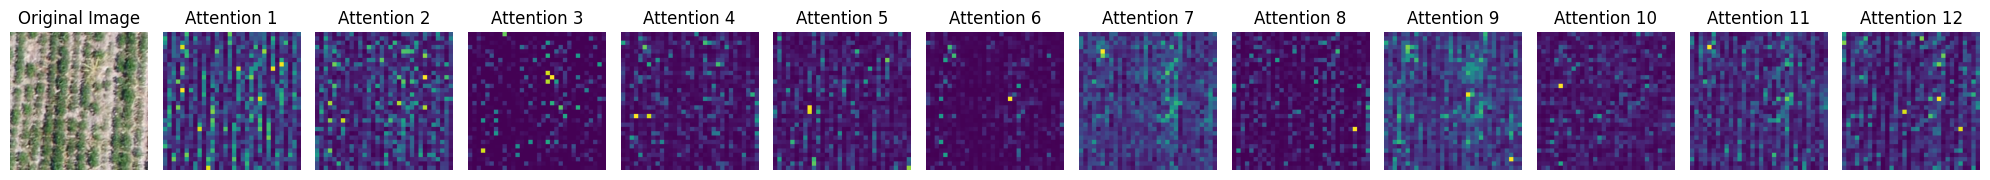

In [4]:
import os
import subprocess

os.chdir('/home/lades/computer_vision/wesley/dino-soja')

comando = [
    'python', 'dino/visualize_attention.py',
    '--arch', 'vit_base',
    '--image_path', '/home/lades/computer_vision/wesley/dataset/daninhas_multiclasse2/rgb/val/2025-06-13_198 - Figueira (Scatolin) 04 Soja - 08 01 25 Survey_22464_29416.jpg',
    '--pretrained_weights', '438_Lambari_01_patches_256x256_output_vit_base_batch_size_8_patch_size_8_epochs_50/checkpoint.pth',
    '--image_size', '256', '256',
    '--output_dir', '.',
    '--patch_size', '8'
]

subprocess.run(comando)

carregar_e_exibir_imagens()

### Parte 2

2) Usar o encoder obtido anteriormente para gerar um "id" (vetor de características) de daninhas.